<a href="https://www.kaggle.com/code/danielebaldoni/italian-vaccination?scriptVersionId=97478016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [316]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/italian-regions/ita_reg_ann_data.csv
/kaggle/input/italian-regions/ita_reg_mens_clima.csv
/kaggle/input/d/arthurio/italian-vaccination/italian_vaccination.csv


<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Flag_of_Italy.svg"
     style="width: 60%; margin: auto; padding-bottom: 20px;">

<h1 style='background:#26A2AB; border:0; color:black'><center>Introduction</center></h1> 

The data contains the following information:  
* **administration_date** - date for the data entry; for some of the dates we have only the daily vaccinations for a specific region and a specific range of age for which the vaccination information is provided;  

* **supplier** - The name of the supplier for the Vaccine
* **region** - Acronyms of Italian regions
* **age_range** - Age groups
* **males** - Number of vaccinated males
* **females** - Number of vaccinated females
* **first_dose** - Number of administered first doses
* **second_dose** - Number of administered second doses
* **previous infection** - Number of administrated doses to subjects previously infected with COVID-19
* **additional_booster_dose** - Number of administrated additional doses or boosters
* **NUTS1_code** - Stands for Nomenclature of Territorial Units for Statistics, is the codes for  5 Italian areas
* **NUTS2_code** - Same like Nuts_1 but it can differ for 21 regions instead of Geografic Areas 
* **ISTAT_regional_code** - short numeric code to every administrative division
* **region_name** - The entire name of the region  

To see the Nuts code you can read here:
https://en.wikipedia.org/wiki/NUTS_statistical_regions_of_Italy

#<a id="0"></a>

<a class="anchor" id="0.1"></a>
### Content  

* <a href='#1'>Analysis preparation</a>
* <a href='#2'>How many are vaccinated for Gender?</a>
* <a href='#3'>How many are vaccinated for Class of Age?</a>
* <a href='#4'>How many are vaccinated for Supplier?</a>
* <a href='#5'>How many are vaccinated for Region?</a>
* <a href='#6'>What vaccines are used in each region?</a> 
* <a href='#7'>How many are vaccinated (total and as percent from population)?</a>    
* <a href='#8'>General trends</a>  


### Last updated


Analysis Prepartion <a class="anchor" id="1" ></a>
===
                                                                                            

In [317]:
data=pd.read_csv("/kaggle/input/d/arthurio/italian-vaccination/italian_vaccination.csv")
data.head()

,data,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,N1,N2,ISTAT,reg
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,ITI,ITI4,12,Lazio
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,ITG,ITG1,19,Sicilia
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,ITF,ITF1,13,Abruzzo


In [318]:
data

,data,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,N1,N2,ISTAT,reg
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,ITI,ITI4,12,Lazio
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,ITG,ITG1,19,Sicilia
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230794,2022-06-03,Pfizer/BioNTech,VEN,50-59,10,11,0,1,2,15,2,1,ITH,ITH3,5,Veneto
230795,2022-06-03,Pfizer/BioNTech,VEN,60-69,7,9,1,1,0,9,2,3,ITH,ITH3,5,Veneto
230796,2022-06-03,Pfizer/BioNTech,VEN,70-79,14,8,0,1,0,10,7,4,ITH,ITH3,5,Veneto
230797,2022-06-03,Pfizer/BioNTech,VEN,80-89,58,67,1,2,0,10,22,90,ITH,ITH3,5,Veneto


In [319]:
data.shape

(230799, 16)

As we see in the cell below the number of rows for the dataset is very high(more than 150k) and 14 columns. 
That's because for every day the data are divided for class of age and region. Just to make an example we have the first 146 rows related to the single day of 2020-12-27.

We should make some grouping operation if we want to understand more the different aspect 

In [320]:
data.nunique()

data         524
supplier       6
region        21
eta           10
m           5184
f           5323
d1          5071
d2          4959
dpi          502
db1         5202
dbi          367
db2          737
N1             5
N2            21
ISTAT         20
reg           21
dtype: int64

We have 5 different suppliers, 21 different regions (20 + the autonomous province of Trento and Bolzano) and 10 different range of Age so we have a lot of different combinations of data (at the same time  we have to remember that we don't have data for every  single day for the different combination of this features that's why a line plot could not represent uniformly the trend of the vaccines). 

That's why some vaccines are retired and other vaccines are introduced in a second moment.

Just to make an example we have 3 different number of rows related to the 3 different dates in the cell below

In [321]:
data.columns

Index(['data', 'supplier', 'region', 'eta', 'm', 'f', 'd1', 'd2', 'dpi', 'db1',
       'dbi', 'db2', 'N1', 'N2', 'ISTAT', 'reg'],
      dtype='object')

In [322]:
#the first date in december 2021 has 147 rows, the second in march 2021 is of 461 and the last in january 2022 is 407
data.data.unique()
data[data.data=='2020-12-27'].count()[1],data[data.data=='2021-03-15'].count()[1],data[data.data=='2022-01-05'].count()[1],data[data.data=="2022-06-03"].count()[1]

(148, 462, 407, 298)

In [323]:
data.region.value_counts()

LAZ    13875
LOM    13128
EMR    12477
CAM    12324
PIE    12258
SIC    12220
VEN    12210
CAL    11725
MAR    11661
PUG    11431
ABR    11362
TOS    11323
LIG    10699
SAR    10616
FVG    10509
BAS     9947
UMB     9372
PAB     9105
PAT     8992
MOL     8108
VDA     7457
Name: region, dtype: int64

at the same time we have to consider the frequence of data for every region is not the same. Lazio was one of the faster region in this campaign and one of the most populated, that's why we have the highest frequency of data for this region

In [324]:
#Number of rows for different vaccines
data.supplier.value_counts()

Pfizer/BioNTech            94034
Moderna                    79876
Vaxzevria (AstraZeneca)    27876
Janssen                    19336
Novavax                     6669
Pfizer for children         3008
Name: supplier, dtype: int64

The sum of Males and Females should be equal to: 
first doses + second doses + previous infection + additional dose + booster dose

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230799 entries, 0 to 230798
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   data      230799 non-null  object
 1   supplier  230799 non-null  object
 2   region    230799 non-null  object
 3   eta       230799 non-null  object
 4   m         230799 non-null  int64 
 5   f         230799 non-null  int64 
 6   d1        230799 non-null  int64 
 7   d2        230799 non-null  int64 
 8   dpi       230799 non-null  int64 
 9   db1       230799 non-null  int64 
 10  dbi       230799 non-null  int64 
 11  db2       230799 non-null  int64 
 12  N1        230799 non-null  object
 13  N2        230799 non-null  object
 14  ISTAT     230799 non-null  int64 
 15  reg       230799 non-null  object
dtypes: int64(9), object(7)
memory usage: 28.2+ MB


We have both categorical and numerical features and we can make different kind of plots depending on the combinations of thi type of features.

The Age is grouped in class it's still categorical but we could make a transformation to treat it as numeric.

We can make some kind of grouping on the various modality of the categorical features.

How many are vaccinated for Gender? <a class="anchor" id="2"></a>
===


First of all we import the 2 libraries most used for graphical options. 
*Matplotlib* and *Seaborn*

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

The total of vaccination for gender is  of 64596637 vaccination for women and 60895478 for men as we can see below

In [327]:
data.f.sum(),data.m.sum()

(70704129, 67121119)

In [328]:
total_vaccinations=data.m.sum()+data.f.sum()
total_vaccinations

137825248

Let's organize this data in a tabular way

In [329]:
print("Number of Vaccination for Gender")
tot=np.array([data.m.sum(),data.f.sum()])
tot=pd.DataFrame(tot,index=["Males","Females"])
tot.columns=["Total"]
tot.gender=["Males","Females"]
tot

Number of Vaccination for Gender


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,Total
Males,67121119
Females,70704129


The difference is minimum.

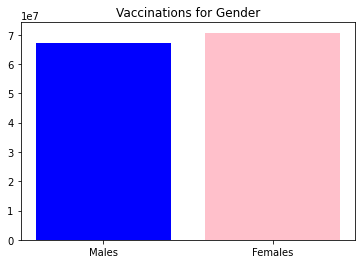

In [330]:
plt.title("Vaccinations for Gender")
#plt.bar(tot.index,list(tot["Total"].value_counts()),color=["b","pink"])
plt.bar(tot.index,list(tot["Total"]),color= ["b","pink"])
#plt.bar(list(tot["Total"].value_counts()[0:1].keys()),list(tot["Total"].value_counts()[0:1]))
#plt.bar(list(fifa['nationality'].value_counts()[0:5].keys()),list(fifa['nationality'].value_counts()[0:5]),color="g")
plt.show()       



Of course we have to weight this data with the real  values for the distribution of the population in Italy.
We found in this site this values of 28864088 for Male population and 30393478 for Female population who is registered at the moment in Italy. 

You can find this data at this site:
28864088
https://www.statista.com/statistics/786485/population-by-gender-in-italy/

In [331]:
tot["Registered"]=[28864088,30393478]
tot["Prop"]=tot.Total/tot.Registered
tot

,Total,Registered,Prop
Males,67121119,28864088,2.325420
Females,70704129,30393478,2.326293


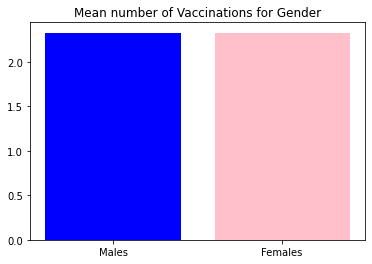

In [332]:
plt.title("Mean number of Vaccinations for Gender")
plt.bar(tot.index,list(tot["Prop"]),color=["b","pink"])
#plt.bar(list(tot["Total"].value_counts()[0:1].keys()),list(tot["Total"].value_counts()[0:1]))
#plt.bar(list(fifa['nationality'].value_counts()[0:5].keys()),list(fifa['nationality'].value_counts()[0:5]),color="g")
plt.show()

In the 2 tables below we observe the number of the complexive vaccination for gender in the different regions

In [333]:
print("Number of Vaccination for Region on male population")
pd.DataFrame(data.groupby("reg")["m"].sum().sort_values(ascending =False))

Number of Vaccination for Region on male population


,m
reg,
Lombardia,11789522
Lazio,6508983
Campania,6139288
Veneto,5459542
Emilia-Romagna,5135282
Sicilia,5064816
Piemonte,4949901
Puglia,4538789
Toscana,4291151


In [334]:
print("Number of Vaccination for Region on female population")
pd.DataFrame(data.groupby("reg")["f"].sum().sort_values(ascending = False))

Number of Vaccination for Region on female population


,f
reg,
Lombardia,12273648
Lazio,7029553
Campania,6445081
Veneto,5623060
Emilia-Romagna,5378723
Sicilia,5373018
Piemonte,5226316
Puglia,4867648
Toscana,4558760


This table represent the number of different kind of vaccination for day. As we can see in the beginning we had just 2 kind of vaccinations ( first doses and doses for previous infection).
While many people has already vaccinated in this phase the most of vaccines are additional booster for people who already get 2 doses but the number of first and second doses tells us the number of people withouth any vaccination is decreasing by few tens of thousands for day

Data Grouped by day
----

In [335]:
data.groupby("data")["d1","d2","dpi","db1","dbi","db2"].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,d1,d2,dpi,db1,dbi,db2
data,,,,,,
2020-12-27,7333,0,17,0,0,0
2020-12-28,1503,0,2,0,0,0
2020-12-29,1098,0,1,0,0,0
2020-12-30,4881,0,6,0,0,0
2020-12-31,25902,0,47,0,0,0
...,...,...,...,...,...,...
2022-05-30,298,707,208,7932,3640,10942
2022-05-31,330,783,217,8401,4554,13620
2022-06-01,319,607,216,7462,3087,10184


In [336]:
data

,data,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,N1,N2,ISTAT,reg
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,ITI,ITI4,12,Lazio
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,ITG,ITG1,19,Sicilia
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230794,2022-06-03,Pfizer/BioNTech,VEN,50-59,10,11,0,1,2,15,2,1,ITH,ITH3,5,Veneto
230795,2022-06-03,Pfizer/BioNTech,VEN,60-69,7,9,1,1,0,9,2,3,ITH,ITH3,5,Veneto
230796,2022-06-03,Pfizer/BioNTech,VEN,70-79,14,8,0,1,0,10,7,4,ITH,ITH3,5,Veneto
230797,2022-06-03,Pfizer/BioNTech,VEN,80-89,58,67,1,2,0,10,22,90,ITH,ITH3,5,Veneto


In [337]:
data["dailytotal"]=data.m+data.f
data


,data,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,N1,N2,ISTAT,reg,dailytotal
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,ITI,ITI4,12,Lazio,1
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,ITG,ITG1,19,Sicilia,1
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,ITF,ITF1,13,Abruzzo,2
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,ITF,ITF1,13,Abruzzo,5
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,ITF,ITF1,13,Abruzzo,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230794,2022-06-03,Pfizer/BioNTech,VEN,50-59,10,11,0,1,2,15,2,1,ITH,ITH3,5,Veneto,21
230795,2022-06-03,Pfizer/BioNTech,VEN,60-69,7,9,1,1,0,9,2,3,ITH,ITH3,5,Veneto,16
230796,2022-06-03,Pfizer/BioNTech,VEN,70-79,14,8,0,1,0,10,7,4,ITH,ITH3,5,Veneto,22
230797,2022-06-03,Pfizer/BioNTech,VEN,80-89,58,67,1,2,0,10,22,90,ITH,ITH3,5,Veneto,125


In [338]:
#data["dailytotal"]=data.groupby("data")["m"].sum()+data.groupby("data")["f"].sum()
dictionary={"males":data.groupby("data")["m"].sum(),"females":data.groupby("data")["f"].sum()}
daily_gender=pd.DataFrame(dictionary)
daily_gender["Total"]=daily_gender.males+daily_gender.females
daily_gender

,males,females,Total
data,,,
2020-12-27,3499,3851,7350
2020-12-28,689,816,1505
2020-12-29,487,612,1099
2020-12-30,1965,2922,4887
2020-12-31,10066,15883,25949
...,...,...,...
2022-05-30,10112,13615,23727
2022-05-31,11706,16199,27905
2022-06-01,9210,12665,21875


How many are vaccinated for Class of Age <a class='anchor' id= 3></a>
===


In [339]:
data.eta

0         40-49
1           90+
2         20-29
3         30-39
4         40-49
          ...  
230794    50-59
230795    60-69
230796    70-79
230797    80-89
230798      90+
Name: eta, Length: 230799, dtype: object

In [340]:
print("Number of Vaccination for Age in class for the male population")
data.groupby("eta")["m"].sum().sort_values(ascending = False)

Number of Vaccination for Age in class for the male population


eta
50-59    11968546
40-49    10274443
60-69     9628879
30-39     8140884
70-79     7725734
20-29     7715532
12-19     5016005
80-89     4589139
05-11     1321975
90+        739982
Name: m, dtype: int64

In [341]:
print("Number of Vaccination for Age in class for the female population")
data.groupby("eta")["f"].sum().sort_values()

Number of Vaccination for Age in class for the female population


eta
05-11     1256717
90+       1752750
12-19     4721552
80-89     6459195
20-29     7061494
30-39     7782629
70-79     8761884
60-69    10201346
40-49    10378508
50-59    12328054
Name: f, dtype: int64

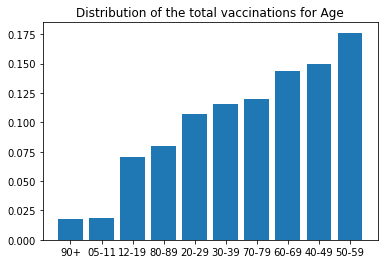

In [342]:
total_vaccination=data.m.sum()+data.f.sum()
plt.title("Distribution of the total vaccinations for Age")
age_vac=pd.DataFrame(data.groupby("eta")["dailytotal"].sum().sort_values()/total_vaccinations)
age_vac.columns=["Total"]
plt.bar(age_vac.index,list(age_vac["Total"]))
plt.show()

In [343]:
print(((data.groupby("eta")["dailytotal"].sum().sort_values()/total_vaccinations)*100).round(2))

eta
90+       1.81
05-11     1.87
12-19     7.07
80-89     8.02
20-29    10.72
30-39    11.55
70-79    11.96
60-69    14.39
40-49    14.98
50-59    17.63
Name: dailytotal, dtype: float64


In [344]:
data.m.sum()

67121119

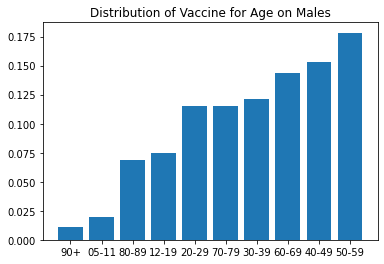

In [345]:
plt.title("Distribution of Vaccine for Age on Males")
age_m=pd.DataFrame(data.groupby("eta")["m"].sum().sort_values()/data.m.sum())
#(data.groupby("age_range")["dailytotal"].sum().sort_values()/60627130)
age_m.columns=["Total"]
plt.bar(age_m.index,list(age_m["Total"]))
plt.show()

In [346]:
((data.groupby("eta")["m"].sum().sort_values()/data.m.sum())*100).round(2).sort_values(ascending=False)


eta
50-59    17.83
40-49    15.31
60-69    14.35
30-39    12.13
70-79    11.51
20-29    11.49
12-19     7.47
80-89     6.84
05-11     1.97
90+       1.10
Name: m, dtype: float64

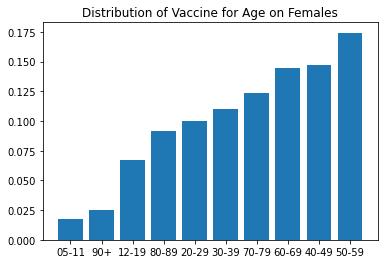

In [347]:
plt.title("Distribution of Vaccine for Age on Females")
age_f= pd.DataFrame(data.groupby("eta")["f"].sum().sort_values()/data.f.sum())
age_f.columns=["Total"]
plt.bar(age_f.index,list(age_f["Total"]))
plt.show()

We can found some differences in percentage but to make conclusions we should know the demographic structure of the population. 

For example we can see that the percentage of old people (90+) vaccinated in the female population is double than the male proportion but it could be due to the fact that women as in mean an higher life expectation.

In general we can't see a particular difference for the age structure of population in the diffrent class of age. 


In [348]:
data.columns

Index(['data', 'supplier', 'region', 'eta', 'm', 'f', 'd1', 'd2', 'dpi', 'db1',
       'dbi', 'db2', 'N1', 'N2', 'ISTAT', 'reg', 'dailytotal'],
      dtype='object')

How many are vaccinated for Supplier? <a class="anchor" id="4"></a>
===


In [349]:
male=pd.DataFrame(data.groupby("supplier")["m"].sum().sort_values(ascending = False)/data.m.sum())
female=pd.DataFrame(data.groupby("supplier")["f"].sum().sort_values(ascending = False)/data.f.sum())

In [350]:
male

,m
supplier,
Pfizer/BioNTech,0.626935
Moderna,0.254633
Vaxzevria (AstraZeneca),0.085567
Pfizer for children,0.019695
Janssen,0.012868
Novavax,0.000301


In [351]:
female

,f
supplier,
Pfizer/BioNTech,0.641801
Moderna,0.240177
Vaxzevria (AstraZeneca),0.090839
Pfizer for children,0.017774
Janssen,0.009106
Novavax,0.000303


We could note 2 facts:
- Women seems to prefer a little more pfizer than the men.
- Janssen seems to be more diffused in the men population

The differences aniway are not so much strong, 


In [352]:
data.groupby("supplier")["m"].sum(),data.groupby("supplier")["f"].sum()

(supplier
 Janssen                      863720
 Moderna                    17091285
 Novavax                       20176
 Pfizer for children         1321975
 Pfizer/BioNTech            42080591
 Vaxzevria (AstraZeneca)     5743372
 Name: m, dtype: int64,
 supplier
 Janssen                      643853
 Moderna                    16981500
 Novavax                       21400
 Pfizer for children         1256717
 Pfizer/BioNTech            45377995
 Vaxzevria (AstraZeneca)     6422664
 Name: f, dtype: int64)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


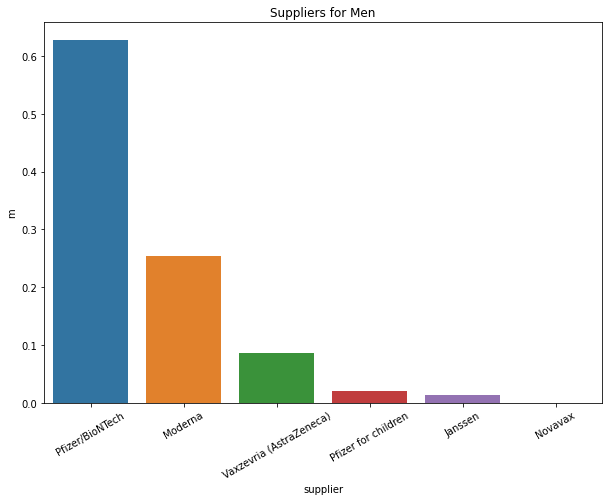

In [353]:
plt.figure(figsize=(10,7))
plt.title ("Suppliers for Men")
sns.barplot(male.index,male.m)
plt.xticks(rotation=30)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


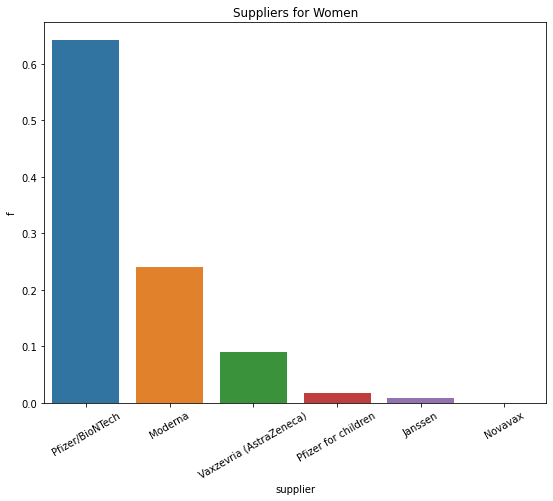

In [354]:
plt.figure(figsize=(9,7))
plt.title ("Suppliers for Women")
sns.barplot(female.index,female.f)
plt.xticks(rotation=30)
plt.show()

In [355]:
data.supplier.value_counts()

Pfizer/BioNTech            94034
Moderna                    79876
Vaxzevria (AstraZeneca)    27876
Janssen                    19336
Novavax                     6669
Pfizer for children         3008
Name: supplier, dtype: int64

In [356]:
supplier_tot=pd.DataFrame(data.groupby("supplier").sum())
supplier_tot

,m,f,d1,d2,dpi,db1,dbi,db2,ISTAT,dailytotal
supplier,,,,,,,,,,
Janssen,863720,643853,1507573,0,0,0,0,0,194473,1507573
Moderna,17091285,16981500,6682851,6720060,387078,20024583,72716,185497,830668,34072785
Novavax,20176,21400,21406,17912,2258,0,0,0,64550,41576
Pfizer for children,1321975,1256717,1310802,1186109,81781,0,0,0,31362,2578692
Pfizer/BioNTech,42080591,45377995,32934728,32860399,1335495,19581815,204516,541633,966766,87458586
Vaxzevria (AstraZeneca),5743372,6422664,6360676,5642860,162500,0,0,0,293959,12166036


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


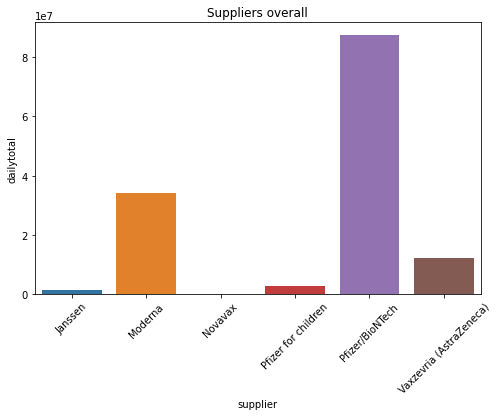

In [357]:
plt.figure(figsize=(8,5))
plt.title ("Suppliers overall")
sns.barplot(supplier_tot.index,supplier_tot.dailytotal)
plt.xticks(rotation=45)
plt.show()

In [358]:
male

,m
supplier,
Pfizer/BioNTech,0.626935
Moderna,0.254633
Vaxzevria (AstraZeneca),0.085567
Pfizer for children,0.019695
Janssen,0.012868
Novavax,0.000301


In [359]:
massi=male
massi["gender"]="male"
massi.columns=["tot","gender"]
#massi["tot"]=massi["tot"]*60895478
massi


,tot,gender
supplier,,
Pfizer/BioNTech,0.626935,male
Moderna,0.254633,male
Vaxzevria (AstraZeneca),0.085567,male
Pfizer for children,0.019695,male
Janssen,0.012868,male
Novavax,0.000301,male


In [360]:
female["gender"]="female"
female.columns=["tot","gender"]
female


,tot,gender
supplier,,
Pfizer/BioNTech,0.641801,female
Moderna,0.240177,female
Vaxzevria (AstraZeneca),0.090839,female
Pfizer for children,0.017774,female
Janssen,0.009106,female
Novavax,0.000303,female


In [361]:
data.groupby("supplier")["m"].sum()

supplier
Janssen                      863720
Moderna                    17091285
Novavax                       20176
Pfizer for children         1321975
Pfizer/BioNTech            42080591
Vaxzevria (AstraZeneca)     5743372
Name: m, dtype: int64

In [362]:
#male.index.sort_values()
supp_man=pd.Series(data.groupby("supplier")["m"].sum())
supp_women=pd.Series(data.groupby("supplier")["f"].sum())
supp_women
supplier_gender={"man":supp_man,"woman":supp_women}
pd.DataFrame(supplier_gender,index=male.index.sort_values())

,man,woman
supplier,,
Janssen,863720,643853
Moderna,17091285,16981500
Novavax,20176,21400
Pfizer for children,1321975,1256717
Pfizer/BioNTech,42080591,45377995
Vaxzevria (AstraZeneca),5743372,6422664


In [363]:

massi.tot=data.groupby("supplier")["m"].sum().sort_values(ascending = False)
female.tot=data.groupby("supplier")["f"].sum().sort_values(ascending = False)
genderdf=[male,female]
genderdf=pd.concat(genderdf)
genderdf["supplier"]=genderdf.index
genderdf


,tot,gender,supplier
supplier,,,
Pfizer/BioNTech,42080591,male,Pfizer/BioNTech
Moderna,17091285,male,Moderna
Vaxzevria (AstraZeneca),5743372,male,Vaxzevria (AstraZeneca)
Pfizer for children,1321975,male,Pfizer for children
Janssen,863720,male,Janssen
Novavax,20176,male,Novavax
Pfizer/BioNTech,45377995,female,Pfizer/BioNTech
Moderna,16981500,female,Moderna
Vaxzevria (AstraZeneca),6422664,female,Vaxzevria (AstraZeneca)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Pfizer/BioNTech'),
  Text(1, 0, 'Moderna'),
  Text(2, 0, 'Vaxzevria (AstraZeneca)'),
  Text(3, 0, 'Pfizer for children'),
  Text(4, 0, 'Janssen'),
  Text(5, 0, 'Novavax')])

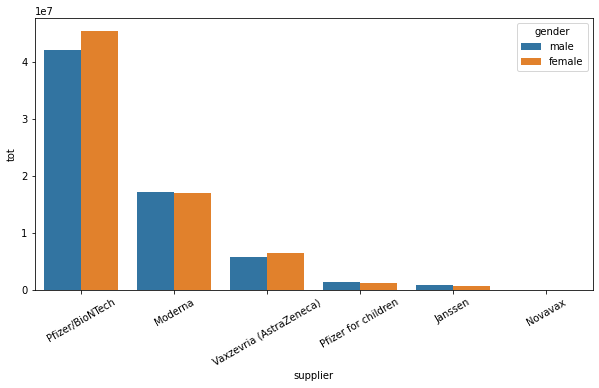

In [364]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="supplier", y= "tot",hue="gender", data =genderdf)
plt.xticks(rotation=30)


How many are vaccinated for Region? <a class="anchor" id="5"></a>
===

In [365]:
regions=pd.read_csv("/kaggle/input/italian-regions/ita_reg_ann_data.csv")
regions

,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
0,1,Piemonte,129322,30300,4356406,25387.07,172,1181,8,2
1,2,Valle d'Aosta,4436,35200,125666,3260.90,39,74,1,0
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
3,4,Trentino Alto Adige,41104,39074,1072276,13605.50,79,282,2,0
4,5,Veneto,155515,33100,4905854,18345.35,267,563,7,1
5,6,Friuli Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
8,9,Toscana,112239,30500,3729641,22987.04,162,273,10,1
9,10,Umbria,21341,24300,882015,8464.33,104,92,2,0


In [366]:
#Let's change ordet to can compare the two datasets
regions=regions.sort_values(by="den_reg")
regions



,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
12,13,Abruzzo,31959,24400,1311580,10831.84,121,305,4,0
16,17,Basilicata,11782,20800,562869,10073.32,56,131,2,0
17,18,Calabria,33054,17100,1947131,15221.90,128,404,5,0
14,15,Campania,106753,18200,5801692,13670.95,424,550,5,1
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
5,6,Friuli Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
11,12,Lazio,185935,32900,5879082,17232.29,341,378,5,2
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
10,11,Marche,40988,26600,1525271,9401.38,162,228,5,0


In [367]:
regions1=regions.copy()
#regions1.append(regions[5:6])
regions1

,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
12,13,Abruzzo,31959,24400,1311580,10831.84,121,305,4,0
16,17,Basilicata,11782,20800,562869,10073.32,56,131,2,0
17,18,Calabria,33054,17100,1947131,15221.90,128,404,5,0
14,15,Campania,106753,18200,5801692,13670.95,424,550,5,1
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
5,6,Friuli Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
11,12,Lazio,185935,32900,5879082,17232.29,341,378,5,2
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
10,11,Marche,40988,26600,1525271,9401.38,162,228,5,0


In [368]:
regions1.den_reg[5]="Friuli-Venezia Giulia"
regions1=regions1.drop(index=(3))
regions1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cod_reg,den_reg,gdp_tot,gdp_procap,pop_resid,superf_kmq,dens_ab,num_com,num_prov,num_teams
12,13,Abruzzo,31959,24400,1311580,10831.84,121,305,4,0
16,17,Basilicata,11782,20800,562869,10073.32,56,131,2,0
17,18,Calabria,33054,17100,1947131,15221.90,128,404,5,0
14,15,Campania,106753,18200,5801692,13670.95,424,550,5,1
7,8,Emilia-Romagna,157420,35300,4459477,22452.78,199,328,9,4
5,6,Friuli-Venezia Giulia,36935,31000,1215220,7924.36,153,215,4,1
11,12,Lazio,185935,32900,5879082,17232.29,341,378,5,2
6,7,Liguria,46789,29678,1550640,5416.21,286,234,4,2
2,3,Lombardia,366541,38200,10060574,23863.65,422,1506,12,4
10,11,Marche,40988,26600,1525271,9401.38,162,228,5,0


In [369]:
data['date'] = pd.to_datetime(data['data'])
data

,data,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,N1,N2,ISTAT,reg,dailytotal,date
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,ITI,ITI4,12,Lazio,1,2020-12-27
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,ITG,ITG1,19,Sicilia,1,2020-12-27
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,ITF,ITF1,13,Abruzzo,2,2020-12-27
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,ITF,ITF1,13,Abruzzo,5,2020-12-27
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,ITF,ITF1,13,Abruzzo,9,2020-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230794,2022-06-03,Pfizer/BioNTech,VEN,50-59,10,11,0,1,2,15,2,1,ITH,ITH3,5,Veneto,21,2022-06-03
230795,2022-06-03,Pfizer/BioNTech,VEN,60-69,7,9,1,1,0,9,2,3,ITH,ITH3,5,Veneto,16,2022-06-03
230796,2022-06-03,Pfizer/BioNTech,VEN,70-79,14,8,0,1,0,10,7,4,ITH,ITH3,5,Veneto,22,2022-06-03
230797,2022-06-03,Pfizer/BioNTech,VEN,80-89,58,67,1,2,0,10,22,90,ITH,ITH3,5,Veneto,125,2022-06-03


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230799 entries, 0 to 230798
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   data        230799 non-null  object        
 1   supplier    230799 non-null  object        
 2   region      230799 non-null  object        
 3   eta         230799 non-null  object        
 4   m           230799 non-null  int64         
 5   f           230799 non-null  int64         
 6   d1          230799 non-null  int64         
 7   d2          230799 non-null  int64         
 8   dpi         230799 non-null  int64         
 9   db1         230799 non-null  int64         
 10  dbi         230799 non-null  int64         
 11  db2         230799 non-null  int64         
 12  N1          230799 non-null  object        
 13  N2          230799 non-null  object        
 14  ISTAT       230799 non-null  int64         
 15  reg         230799 non-null  object        
 16  da

In [372]:
data.head()

,data,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,N1,N2,ISTAT,reg,dailytotal,date
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,ITI,ITI4,12,Lazio,1,2020-12-27
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,ITG,ITG1,19,Sicilia,1,2020-12-27
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,ITF,ITF1,13,Abruzzo,2,2020-12-27
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,ITF,ITF1,13,Abruzzo,5,2020-12-27
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,ITF,ITF1,13,Abruzzo,9,2020-12-27


In [373]:
reg_name=pd.DataFrame(data.groupby("reg")[["dailytotal","d1","d2","dpi","db1","dbi","db2","m","f"]].sum())
#reg_name["pop_resid"]=regions["pop_resid"]
#reg_name["propTV"]=reg_name["TotVaccine"]/reg_name["pop_resid"]
reg_name1=reg_name.drop(index=("Provincia Autonoma Bolzano / Bozen"))
reg_name1=reg_name1.drop(index=("Provincia Autonoma Trento"))
reg_name1

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f
reg,,,,,,,,,
Abruzzo,2979019,1048738,1012576,37238,865549,3721,11197,1450243,1528776
Basilicata,1273462,454698,432342,13975,367394,2048,3005,622609,650853
Calabria,4116568,1512667,1432762,35318,1127682,2826,5313,2007694,2108874
Campania,12584369,4541171,4322528,192676,3478449,19654,29891,6139288,6445081
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723
Friuli-Venezia Giulia,2721366,954269,906709,49787,796920,2454,11227,1332425,1388941
Lazio,13538536,4848070,4473732,170287,3953366,24177,68904,6508983,7029553
Liguria,3526963,1259928,1215872,30351,996997,1930,21885,1703757,1823206
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648


In [374]:
a=pd.DataFrame(data.groupby("reg")["dpi"].sum())
a["first_dose"]=data.groupby("reg")["d1"].sum()
a["second_dose"]=data.groupby("reg")["d2"].sum()
a["booster_dose1"]=data.groupby("reg")["db1"].sum()
a["booster_dose_inf"]=data.groupby("reg")["dbi"].sum()
a["booster_dose2"]=data.groupby("reg")["db2"].sum()
a

,dpi,first_dose,second_dose,booster_dose1,booster_dose_inf,booster_dose2
reg,,,,,,
Abruzzo,37238,1048738,1012576,865549,3721,11197
Basilicata,13975,454698,432342,367394,2048,3005
Calabria,35318,1512667,1432762,1127682,2826,5313
Campania,192676,4541171,4322528,3478449,19654,29891
Emilia-Romagna,169699,3660377,3509980,3027022,38270,108657
Friuli-Venezia Giulia,49787,954269,906709,796920,2454,11227
Lazio,170287,4848070,4473732,3953366,24177,68904
Liguria,30351,1259928,1215872,996997,1930,21885
Lombardia,329035,8421668,7962602,7174683,43449,131733


In [375]:
a=regions1.pop_resid
a.index=reg_name1.index
reg_name1["pop_resid"]=a
reg_name1
reg_name1["propTV"]=reg_name1["dailytotal"]/reg_name1["pop_resid"]#numero di vaccini a persona
reg_name1

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV
reg,,,,,,,,,,,
Abruzzo,2979019,1048738,1012576,37238,865549,3721,11197,1450243,1528776,1311580,2.271321
Basilicata,1273462,454698,432342,13975,367394,2048,3005,622609,650853,562869,2.262448
Calabria,4116568,1512667,1432762,35318,1127682,2826,5313,2007694,2108874,1947131,2.114171
Campania,12584369,4541171,4322528,192676,3478449,19654,29891,6139288,6445081,5801692,2.169086
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723,4459477,2.357677
Friuli-Venezia Giulia,2721366,954269,906709,49787,796920,2454,11227,1332425,1388941,1215220,2.239402
Lazio,13538536,4848070,4473732,170287,3953366,24177,68904,6508983,7029553,5879082,2.302832
Liguria,3526963,1259928,1215872,30351,996997,1930,21885,1703757,1823206,1550640,2.274521
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829


In [376]:
reg_name1.sort_values(by=("propTV"),ascending = False).head()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV
reg,,,,,,,,,,,
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829
Toscana,8849911,3131369,3008472,117199,2517061,16769,59041,4291151,4558760,3729641,2.372859
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723,4459477,2.357677
Piemonte,10176217,3485088,3317961,165900,2962400,71307,173561,4949901,5226316,4356406,2.335920
Puglia,9406437,3331139,3169444,145281,2727110,13610,19853,4538789,4867648,4029053,2.334652


In [377]:
reg_name1.sort_values(by=("propTV"),ascending = False).tail()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV
reg,,,,,,,,,,,
Valle d'Aosta / Vallée d'Aoste,278875,96656,93031,3557,84211,558,862,137338,141537,125666,2.219176
Marche,3377707,1189605,1144528,50911,978615,4416,9632,1644788,1732919,1525271,2.214496
Campania,12584369,4541171,4322528,192676,3478449,19654,29891,6139288,6445081,5801692,2.169086
Calabria,4116568,1512667,1432762,35318,1127682,2826,5313,2007694,2108874,1947131,2.114171
Sicilia,10437834,3846560,3645962,120267,2801263,8459,15323,5064816,5373018,4999891,2.087612


In [378]:
T_A_A=reg_name[12:14]
reg_name[12:14]

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f
reg,,,,,,,,,
Provincia Autonoma Bolzano / Bozen,1116223,401233,379237,23314,307721,2150,2568,559557,556666
Provincia Autonoma Trento,1248905,437871,418709,29642,355971,1406,5306,618175,630730


In [379]:
T_A_A.iloc[0,0]

1116223

In [380]:
#For Trentino Alto Adige region we have a value who one of the lowest of our distribution.
#with 2.02 is higher just than Sicilia,Calabria,Sardegna and Campania who are all south regions.
vaccination_TAA= T_A_A.iloc[0,0]+T_A_A.iloc[1,0]
propTV_TAA=vaccination_TAA/1072276
propTV_TAA

2.205708231835833

we can analize the 2 comunities singularly. We can find online the population for 

Bolzano province = 536838

Trento Province= 542235

who is more or less the same of our dataset (1079073)

https://it.wikipedia.org/wiki/Trentino-Alto_Adige


In [381]:
propBA=T_A_A.iloc[0,0]/536838
print(f"Provincia di Bolzano: {propBA}")
propTR=T_A_A.iloc[1,0]/542235
print(f"Provincia di Trento: {propTR}")

Provincia di Bolzano: 2.0792548217525586
Provincia di Trento: 2.30325412413437


The proportion is really different between the 2 province, we have 1,95 who is the second lowest value ( higher just than Sicilia) for the autonomous province of Bolzano  and 2,13 for the autonomous province of Trento who is near the best values of the other regions. It is curious if we consider that this regions are really near geographically. 

In [382]:
data.d1.sum(),data.d2.sum(),data.db1.sum(),data.dpi.sum(),data.dbi.sum(),data.db2.sum()


(48818036, 46427340, 39606398, 1969112, 277232, 727130)

This is interesting because we can note that some region has an higher percentage of people with previous infection than people vaccinated with the classic cicle of vacccination and viceversa. 

In [383]:
percentages=pd.DataFrame(data.groupby("reg")["dpi"].sum()/data["dpi"].sum())*100
percentages["d1"]=(data.groupby("reg")["d1"].sum()/data.d1.sum())*100
percentages["d2"]=(data.groupby("reg")["d2"].sum()/data.d2.sum())*100
percentages["db1"]=(data.groupby("reg")["db1"].sum()/data.db1.sum())*100
percentages["dbi"]=(data.groupby("reg")["dbi"].sum()/data.dbi.sum())*100
percentages["db2"]=(data.groupby("reg")["db2"].sum()/data.db2.sum())*100
percentages

,dpi,d1,d2,db1,dbi,db2
reg,,,,,,
Abruzzo,1.891106,2.148259,2.180991,2.185377,1.342197,1.539890
Basilicata,0.709711,0.931414,0.931223,0.927613,0.738731,0.413269
Calabria,1.793600,3.098582,3.086031,2.847222,1.019363,0.730681
Campania,9.784918,9.302240,9.310307,8.782543,7.089369,4.110819
Emilia-Romagna,8.618047,7.498001,7.560157,7.642760,13.804323,14.943270
Friuli-Venezia Giulia,2.528399,1.954747,1.952963,2.012099,0.885179,1.544016
Lazio,8.647908,9.930899,9.635986,9.981635,8.720855,9.476160
Liguria,1.541355,2.580866,2.618871,2.517262,0.696168,3.009778
Lombardia,16.709816,17.251141,17.150675,18.114960,15.672433,18.116843


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


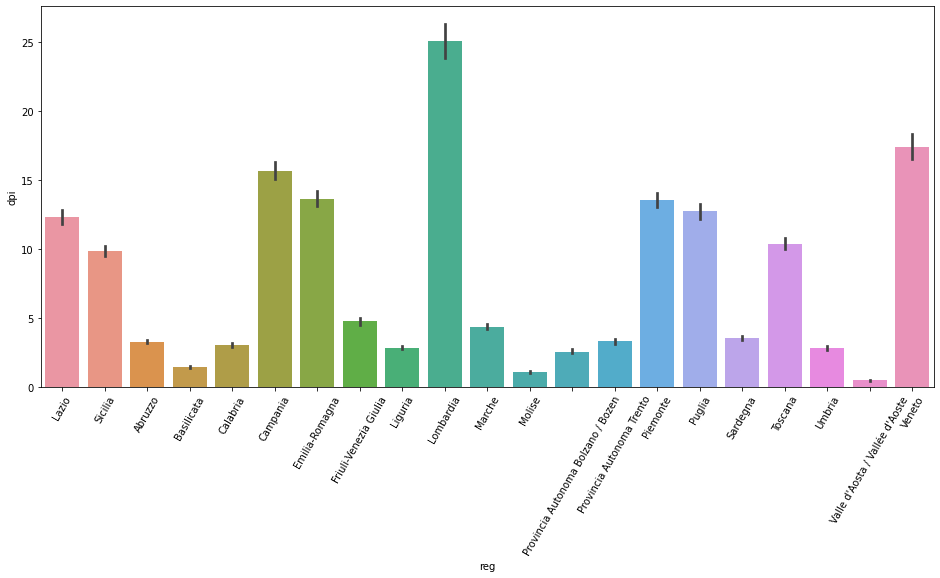

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
sns.barplot(data["reg"],data["dpi"])
plt.xticks(rotation=60)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


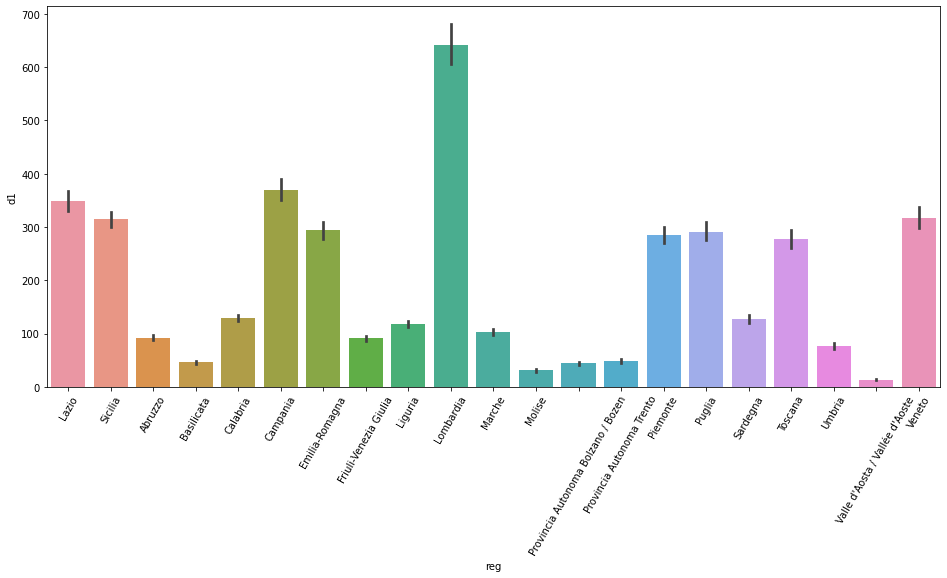

In [394]:
plt.figure(figsize=(16,7))
sns.barplot(data["reg"],data["d1"])
plt.xticks(rotation=60)
plt.show()

In [395]:
reg_name1["1stProp"]=reg_name1["d1"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("1stProp"),ascending = False).head()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV,1stProp
reg,,,,,,,,,,,,
Toscana,8849911,3131369,3008472,117199,2517061,16769,59041,4291151,4558760,3729641,2.372859,0.839590
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829,0.837096
Puglia,9406437,3331139,3169444,145281,2727110,13610,19853,4538789,4867648,4029053,2.334652,0.826780
Lazio,13538536,4848070,4473732,170287,3953366,24177,68904,6508983,7029553,5879082,2.302832,0.824630
Molise,708190,251770,239563,8975,204869,541,2472,344677,363513,305617,2.317247,0.823809


In [396]:
reg_name1["2ndProp"]=reg_name1["d2"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("2ndProp"),ascending = False).head()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV,1stProp,2ndProp
reg,,,,,,,,,,,,,
Toscana,8849911,3131369,3008472,117199,2517061,16769,59041,4291151,4558760,3729641,2.372859,0.839590,0.806638
Sardegna,3783160,1345036,1301605,37619,1086513,5325,7062,1843693,1939467,1639591,2.307380,0.820348,0.793860
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829,0.837096,0.791466
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723,4459477,2.357677,0.820809,0.787083
Puglia,9406437,3331139,3169444,145281,2727110,13610,19853,4538789,4867648,4029053,2.334652,0.826780,0.786647


In [397]:
reg_name1["boostProp"]=reg_name1["db1"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("boostProp"),ascending = False).head()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV,1stProp,2ndProp,boostProp
reg,,,,,,,,,,,,,,
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829,0.837096,0.791466,0.713148
Piemonte,10176217,3485088,3317961,165900,2962400,71307,173561,4949901,5226316,4356406,2.335920,0.799992,0.761628,0.680010
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723,4459477,2.357677,0.820809,0.787083,0.678784
Puglia,9406437,3331139,3169444,145281,2727110,13610,19853,4538789,4867648,4029053,2.334652,0.826780,0.786647,0.676861
Toscana,8849911,3131369,3008472,117199,2517061,16769,59041,4291151,4558760,3729641,2.372859,0.839590,0.806638,0.674880


In [399]:
reg_name1["boostProp2"]=reg_name1["db2"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("boostProp2"),ascending = False).head()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV,1stProp,2ndProp,boostProp,boostProp2
reg,,,,,,,,,,,,,,,
Piemonte,10176217,3485088,3317961,165900,2962400,71307,173561,4949901,5226316,4356406,2.335920,0.799992,0.761628,0.680010,0.039840
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723,4459477,2.357677,0.820809,0.787083,0.678784,0.024365
Toscana,8849911,3131369,3008472,117199,2517061,16769,59041,4291151,4558760,3729641,2.372859,0.839590,0.806638,0.674880,0.015830
Liguria,3526963,1259928,1215872,30351,996997,1930,21885,1703757,1823206,1550640,2.274521,0.812521,0.784110,0.642958,0.014114
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829,0.837096,0.791466,0.713148,0.013094


In [401]:
reg_name1["dpiProp"]=reg_name1["dpi"]/reg_name1["pop_resid"]
reg_name1.sort_values(by=("boostProp"),ascending = False).head()

,dailytotal,d1,d2,dpi,db1,dbi,db2,m,f,pop_resid,propTV,1stProp,2ndProp,boostProp,boostProp2,dpiProp
reg,,,,,,,,,,,,,,,,
Lombardia,24063170,8421668,7962602,329035,7174683,43449,131733,11789522,12273648,10060574,2.391829,0.837096,0.791466,0.713148,0.013094,0.032705
Piemonte,10176217,3485088,3317961,165900,2962400,71307,173561,4949901,5226316,4356406,2.335920,0.799992,0.761628,0.680010,0.039840,0.038082
Emilia-Romagna,10514005,3660377,3509980,169699,3027022,38270,108657,5135282,5378723,4459477,2.357677,0.820809,0.787083,0.678784,0.024365,0.038054
Puglia,9406437,3331139,3169444,145281,2727110,13610,19853,4538789,4867648,4029053,2.334652,0.826780,0.786647,0.676861,0.004927,0.036058
Toscana,8849911,3131369,3008472,117199,2517061,16769,59041,4291151,4558760,3729641,2.372859,0.839590,0.806638,0.674880,0.015830,0.031424


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


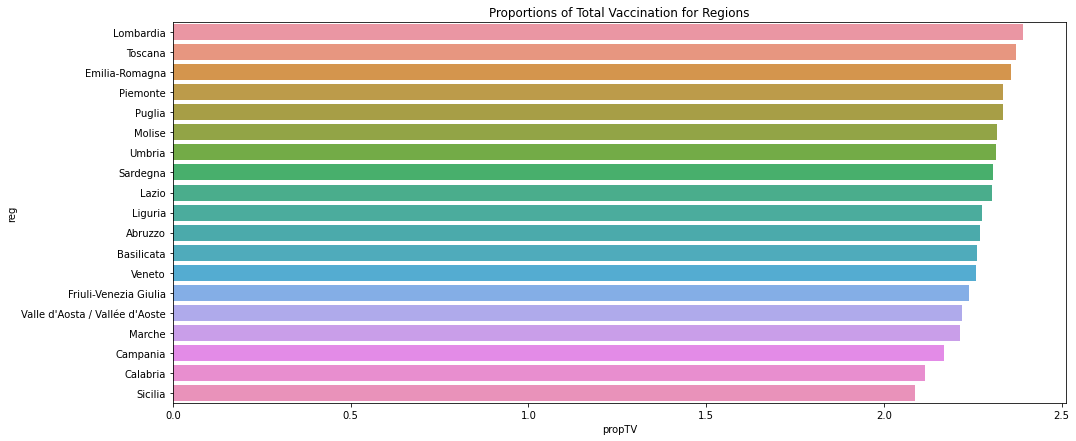

The region with the highest proportion of total vaccinations is: Lombardia


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


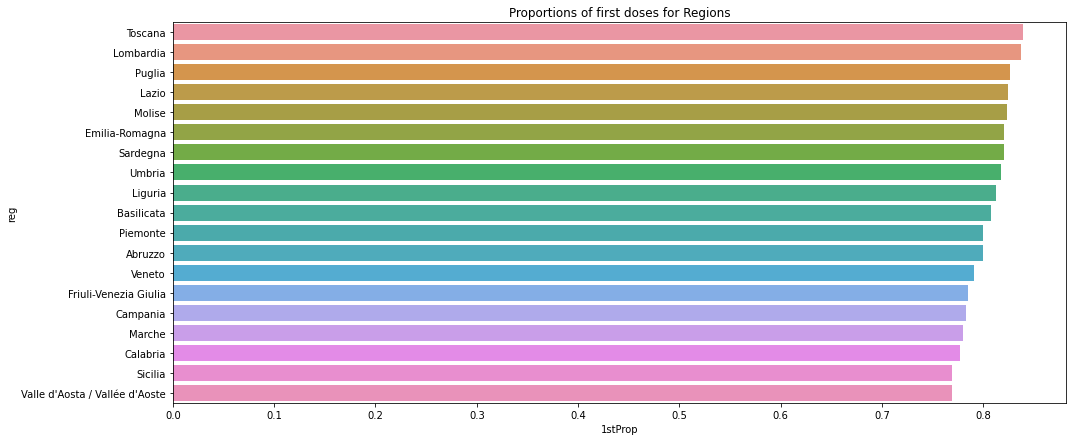

The region with the highest proportion of first doses is: Toscana


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


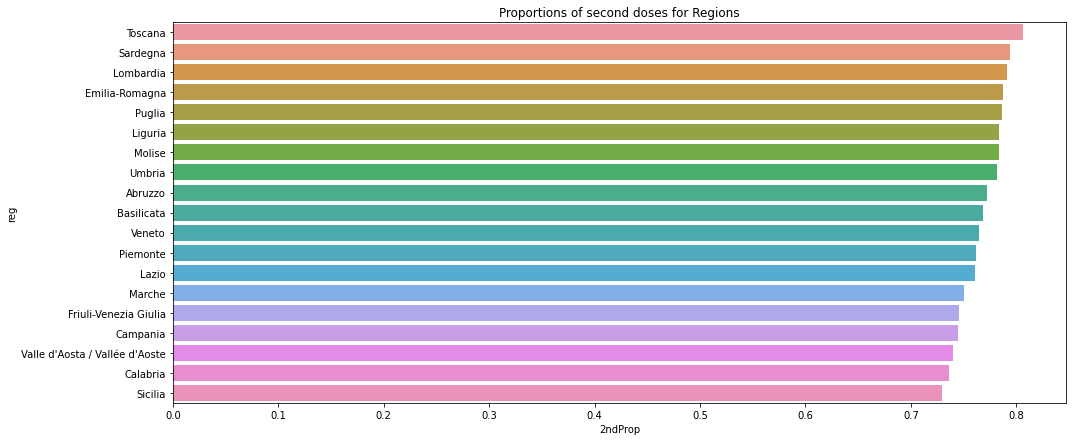

The region with the highest proportion of second doses is: Toscana


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


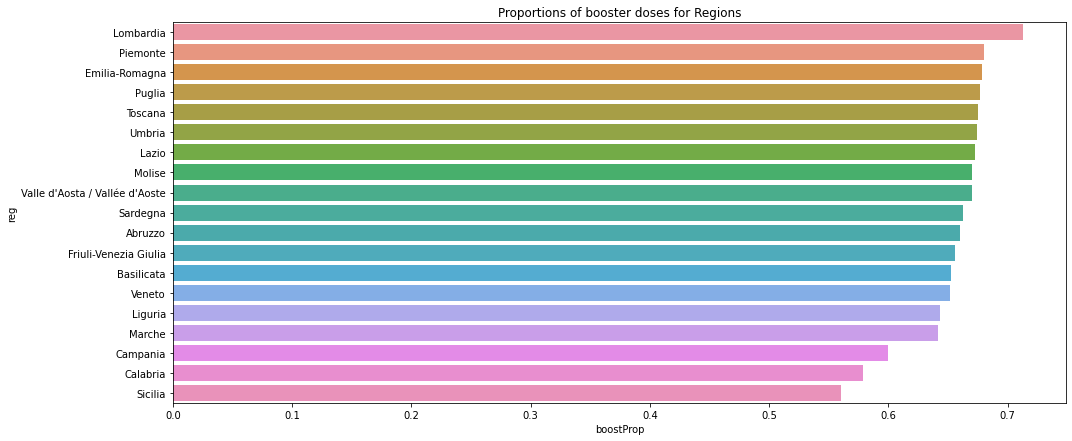

The region with the highest proportion of booster doses is: Lombardia


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


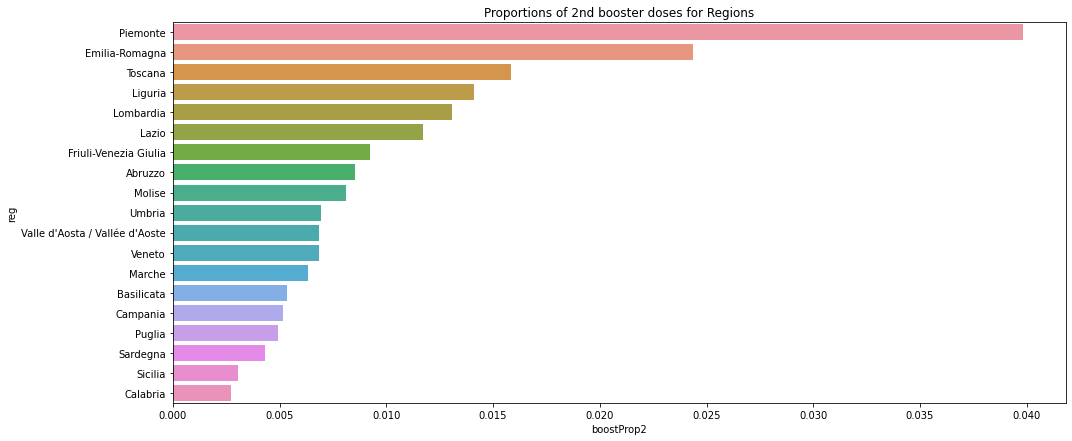

The region with the highest proportion of booster doses is: Piemonte


In [403]:
a=reg_name1.sort_values(by=("propTV"),ascending = False)
plt.figure(figsize=(16,7))
fig=sns.barplot(a["propTV"],a.index)
plt.title("Proportions of Total Vaccination for Regions")
plt.show()
print("The region with the highest proportion of total vaccinations is:", a.index[0]) 

a=reg_name1.sort_values(by=("1stProp"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["1stProp"],a.index)
plt.title("Proportions of first doses for Regions")
plt.show()
print("The region with the highest proportion of first doses is:",a.index[0])

a=reg_name1.sort_values(by=("2ndProp"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["2ndProp"],a.index)
plt.title("Proportions of second doses for Regions")
plt.show()
print("The region with the highest proportion of second doses is:", a.index[0])

a=reg_name1.sort_values(by=("boostProp"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["boostProp"],a.index)
plt.title("Proportions of booster doses for Regions")
plt.show()
print("The region with the highest proportion of booster doses is:",a.index[0])


a=reg_name1.sort_values(by=("boostProp2"),ascending = False)
plt.figure(figsize=(16,7))
sns.barplot(a["boostProp2"],a.index)
plt.title("Proportions of 2nd booster doses for Regions")
plt.show()
print("The region with the highest proportion of booster doses is:",a.index[0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


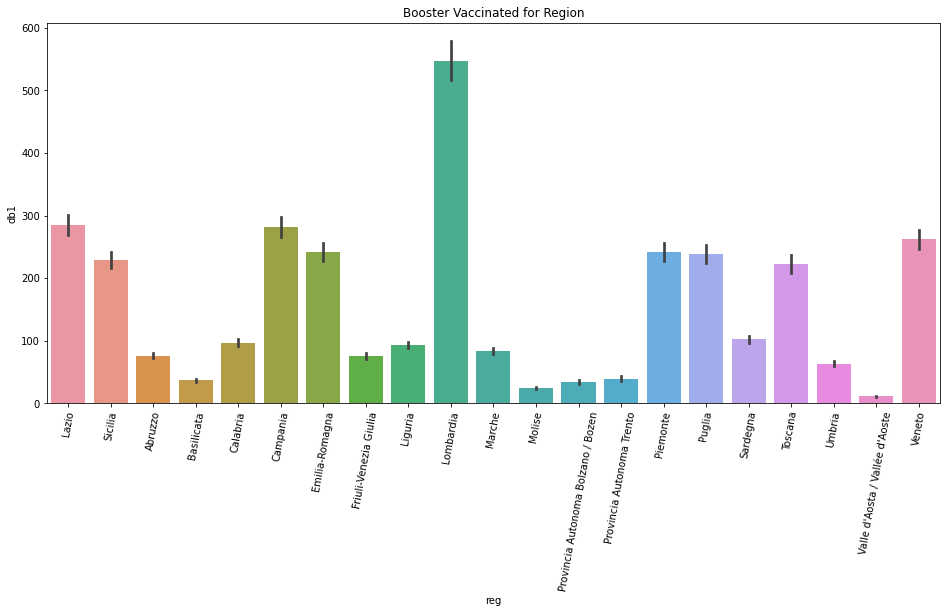

In [407]:
plt.figure(figsize=(16,7))
plt.title("Booster Vaccinated for Region")
sns.barplot(data["reg"],data["db1"])

plt.xticks(rotation=80)
plt.show()

General Trends <a class="anchor" id="8"></a>
===

Data Grouped by day
===
To make an analysis of trends we need to make some grouping operations on the Dataset. 
Here we can group the data by day

In [409]:
data.groupby("date")["d1","d2","dpi","db1","dbi","db2"].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,d1,d2,dpi,db1,dbi,db2
date,,,,,,
2020-12-27,7333,0,17,0,0,0
2020-12-28,1503,0,2,0,0,0
2020-12-29,1098,0,1,0,0,0
2020-12-30,4881,0,6,0,0,0
2020-12-31,25902,0,47,0,0,0
...,...,...,...,...,...,...
2022-05-30,298,707,208,7932,3640,10942
2022-05-31,330,783,217,8401,4554,13620
2022-06-01,319,607,216,7462,3087,10184


We can note that Astrazeneca was the most used in the first period of vaccination while Pfizer was the most diffused during the last year excepting for the last weeks because of the difficult to find other doses of Pfizer.

We can note the presence in the last part of the serie of the new kind of vaccine "Pfizer Pediatrico" who is for young kids. 
Remember that the govern authorized the vaccine for young children just in the last weeks. That's why we find this kind of vaccine just on the right side of the graph.

Due to the recent authorization of vaccines for children we still not have data for the second dose.

This is because of the lack of doses of Pfizer, most people could only have a booster dose of Moderna

Focusing on the last period we can see how it's more common to find booster of moderna Vaccines. 

In [411]:
df = data[['date', 'supplier', 'region', 'eta', 'm',
       'f', 'd1', 'd2', 'dpi', 'db1',
       'dbi', 'db2', 'reg', 'date']].copy()
df.head()

,date,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,reg,date
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,Lazio,2020-12-27
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,Sicilia,2020-12-27
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,Abruzzo,2020-12-27
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,Abruzzo,2020-12-27
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,Abruzzo,2020-12-27


In [412]:
df["TotVaccine"]=data["d1"]+data["d2"]+data["dpi"]+data["db1"]+data["dbi"]+data["db2"]
df

,date,supplier,region,eta,m,f,d1,d2,dpi,db1,dbi,db2,reg,date,TotVaccine
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,0,Lazio,2020-12-27,1
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,0,Sicilia,2020-12-27,1
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,0,Abruzzo,2020-12-27,2
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,0,Abruzzo,2020-12-27,5
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,0,Abruzzo,2020-12-27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230794,2022-06-03,Pfizer/BioNTech,VEN,50-59,10,11,0,1,2,15,2,1,Veneto,2022-06-03,21
230795,2022-06-03,Pfizer/BioNTech,VEN,60-69,7,9,1,1,0,9,2,3,Veneto,2022-06-03,16
230796,2022-06-03,Pfizer/BioNTech,VEN,70-79,14,8,0,1,0,10,7,4,Veneto,2022-06-03,22
230797,2022-06-03,Pfizer/BioNTech,VEN,80-89,58,67,1,2,0,10,22,90,Veneto,2022-06-03,125


Let's see how the situation of the total of daily vaccines has evolved during the time

The campaign begun in january of 2021. We have 2 peakse. The first one is after the introduction of the green pass in July.In this phase the most of the people vaccineted was old people and the part of population who accepted withouth particularly problems this decision. The second peak is in january with the introduction of vaccines for young children simoultaneosly with the new introduction of reinforced green pass. With this law many people who were not vaccinated choose to have the first dose who allowed them to work. In this phase we have a wider distribution of people vaccinated including the ones who were skeptic at the beginning and young people as well.

The goal of the italian government was to get the 80% of the total of population vaccinated or atleast the 90% for the old people and citizen with high risk. We can say that this goal has been achieved despite a slow start and the next step is to increase this percentage for the total population included young people.
We will see in the next months.

https://www.reuters.com/article/us-health-coronavirus-italy-vaccines-idUSKBN2B50L0

In [ ]:
"""
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="TotVaccine",data=df).set_xticklabels(["2020-12-27","2021-03-17","2021-07-01","2021-08-06","2021-12-06"])
plt.title("Previous infection")
plt.show()
"""

Now let's try to aggregate the vaccines in daily somministrations
---

We will create a new dataframe with data grouped for daily  total of vaccinations and we will call it "daily".

In [430]:
df.columns=['date', 'supplier', 'region', 'eta', 'm', 'f', 'd1', 'd2', 'dpi', 'db1',
       'dbi', 'db2', 'reg', 'date1', 'TotVaccine']
df.drop("date1",axis=1,inplace=True)

In [431]:
daily=pd.DataFrame(df.groupby("date")["TotVaccine"].sum())
daily["day"]=df.date.unique()
daily

,TotVaccine,day
date,,
2020-12-27,7350,2020-12-27
2020-12-28,1505,2020-12-28
2020-12-29,1099,2020-12-29
2020-12-30,4887,2020-12-30
2020-12-31,25949,2020-12-31
...,...,...
2022-05-30,23727,2022-05-30
2022-05-31,27905,2022-05-31
2022-06-01,21875,2022-06-01


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


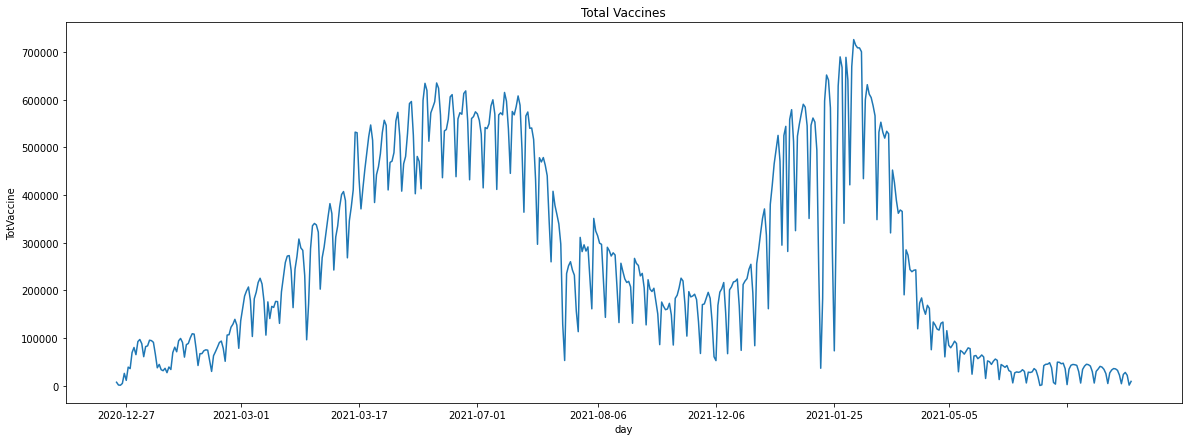

In [433]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="TotVaccine",data=daily).set_xticklabels(["2020-12-27","2021-03-01","2021-03-17","2021-07-01","2021-08-06","2021-12-06","2021-01-25","2021-05-05"])
plt.title("Total Vaccines")
plt.show()

In the last Graph i decided to highlight some specific Dates

What they represent?

The vaccination compaign has begun with the first vaccine on december 2021. Than after a low increase the govern appointed on march 2021 the Paolo Figliuolo as special commissioner for the campagin with the task to organize the distribution of the vaccines.

On March 21th 2021 The European Union has decided to block the somministration of Axtrazeneca and we can note the effet of this decision with the first slowdown on the campaign due to the panic following the release of news related to the side effects of the astrazeneca vaccine in part of the populations.

After the slowdown people resumed this time with other kind of vaccines (especially Pfizer and Moderna) till the summer.
Once the vaccination of people easily convinced (high age groups and people high risk people) by the vaccine was almost finished the govern decided to introduce the  Green Pass to convince the remaining part of population (young age groups and skeptical people).

The first version was discussed in June-July 2021 and became effective on August 6th 2021. We can observe that the number of daily vaccinations was generally stable beginning a decrease at the end of summer due to the fact that most of the population was now vaccinated.

So we can note the last significative data December 6th 2021 who is the day of the introduction of the "Super Green Pass" a new measure that require other restrictive parameters. 

In the first version of Green pass people skeptical could still parteticiate to the social live going to work or attending meeting places even not vaccinated just with an antigenic or molecolar negative swab. 

With the Super Green pass this is no more possible.

At the same time a new wave of infections and the introduction of the Booster dose influenced the new resumptions in the number of daily vaccinations.


In [440]:
daily=pd.DataFrame(df.groupby("date")[["TotVaccine","d1","d2","dpi","db1","dbi","db2","m","f"]].sum())
daily["day"]=df.date.unique()
daily

,TotVaccine,d1,d2,dpi,db1,dbi,db2,m,f,day
date,,,,,,,,,,
2020-12-27,7350,7333,0,17,0,0,0,3499,3851,2020-12-27
2020-12-28,1505,1503,0,2,0,0,0,689,816,2020-12-28
2020-12-29,1099,1098,0,1,0,0,0,487,612,2020-12-29
2020-12-30,4887,4881,0,6,0,0,0,1965,2922,2020-12-30
2020-12-31,25949,25902,0,47,0,0,0,10066,15883,2020-12-31
...,...,...,...,...,...,...,...,...,...,...
2022-05-30,23727,298,707,208,7932,3640,10942,10112,13615,2022-05-30
2022-05-31,27905,330,783,217,8401,4554,13620,11706,16199,2022-05-31
2022-06-01,21875,319,607,216,7462,3087,10184,9210,12665,2022-06-01


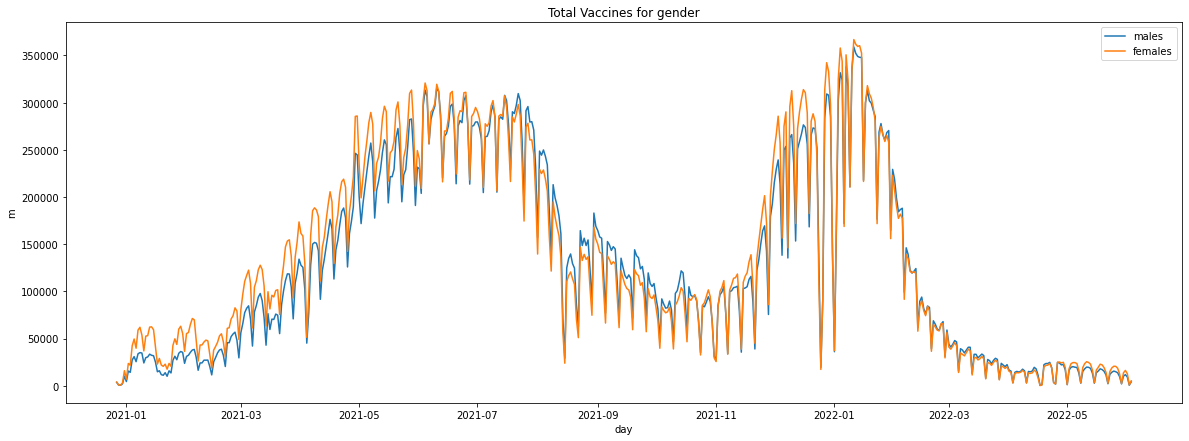

In [442]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="m",data=daily,label="males")
sns.lineplot(x="day",y="f",data=daily,label="females")
plt.title("Total Vaccines for gender")
plt.show()

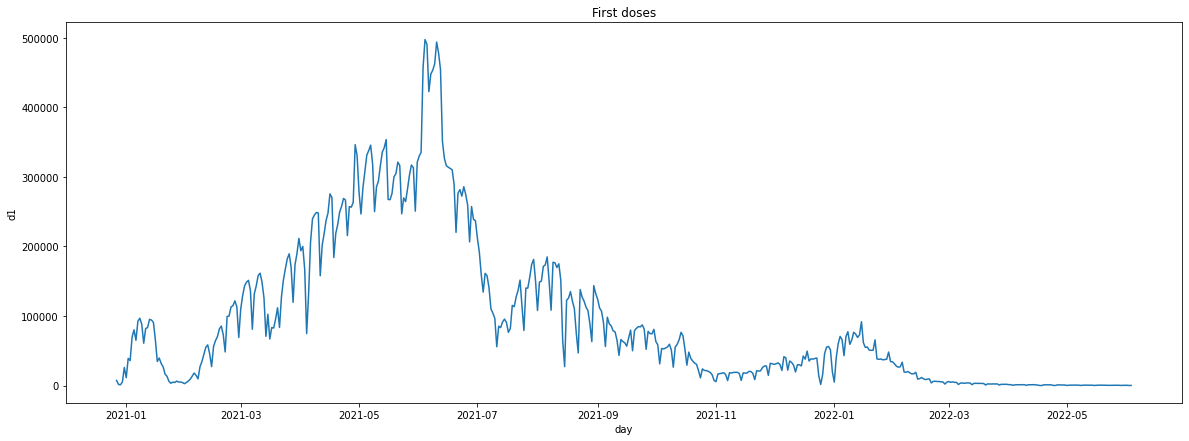

In [443]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="d1",data=daily)
plt.title("First doses")
plt.show()

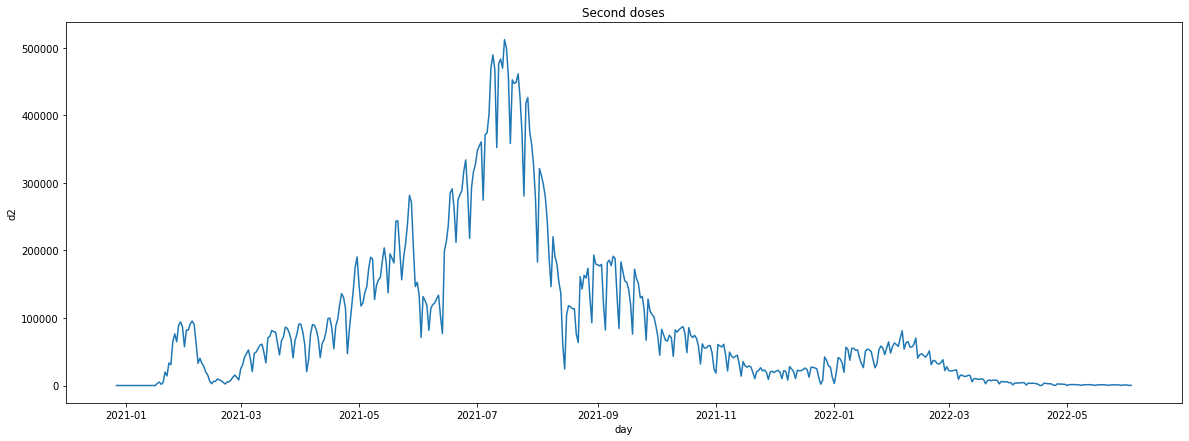

In [444]:
plt.figure(figsize=(20,7))
#sns.lineplot(x="day",y="second_dose",data=daily).set_xticklabels(["2020-12-27","2021-03-01","2021-03-17","2021-07-01","2021-08-06","2021-12-06"])
sns.lineplot(x="day",y="d2",data=daily)
plt.title("Second doses")
plt.show()

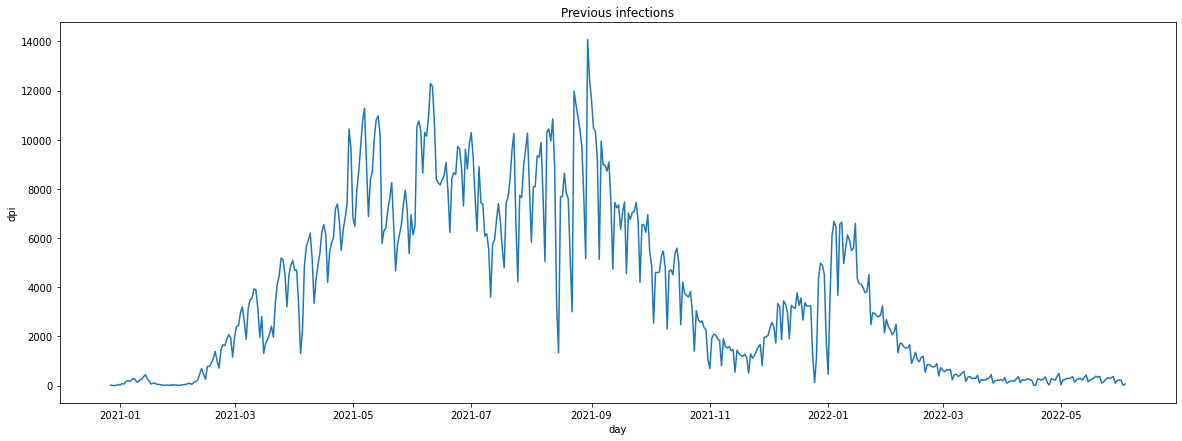

In [445]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="dpi",data=daily)
plt.title("Previous infections")
plt.show()

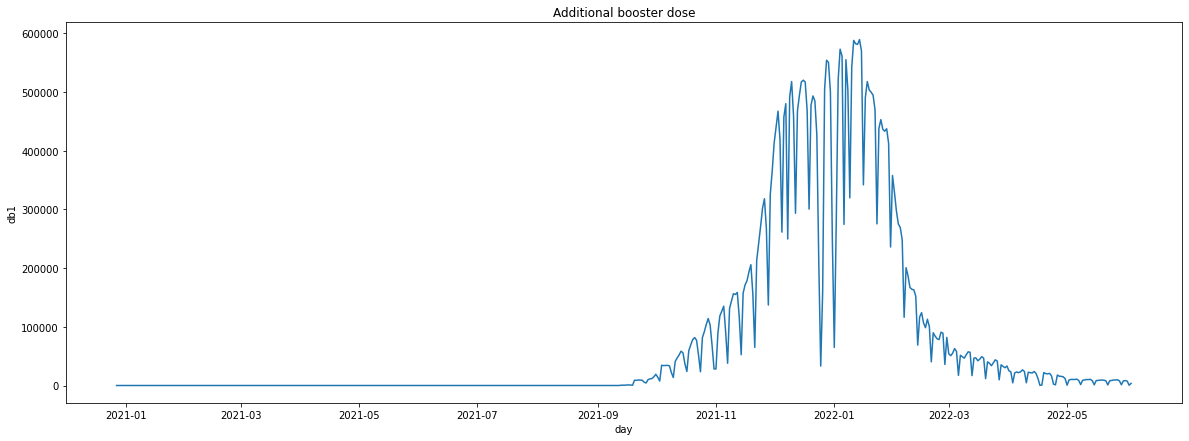

In [446]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="db1",data=daily)
plt.title("Additional booster dose")
plt.show()

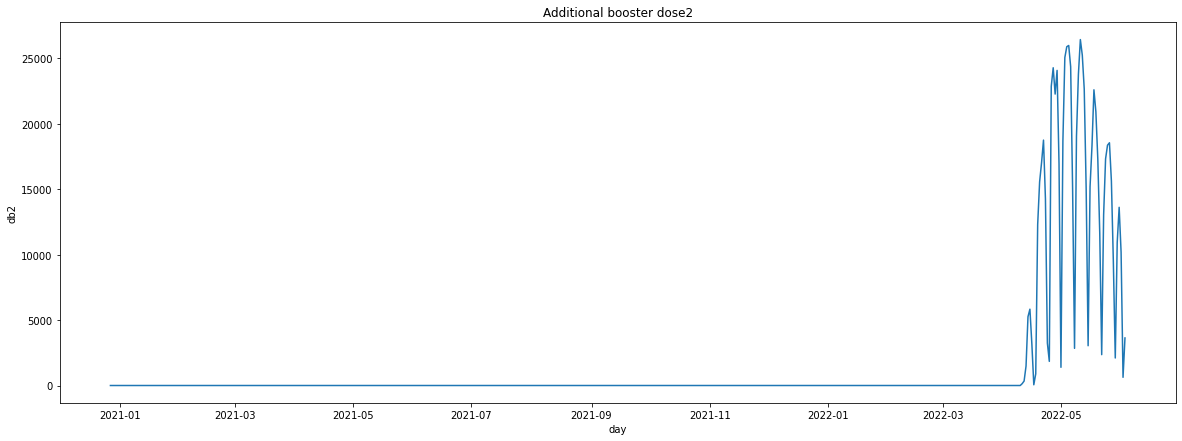

In [447]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="db2",data=daily)
plt.title("Additional booster dose2")
plt.show()

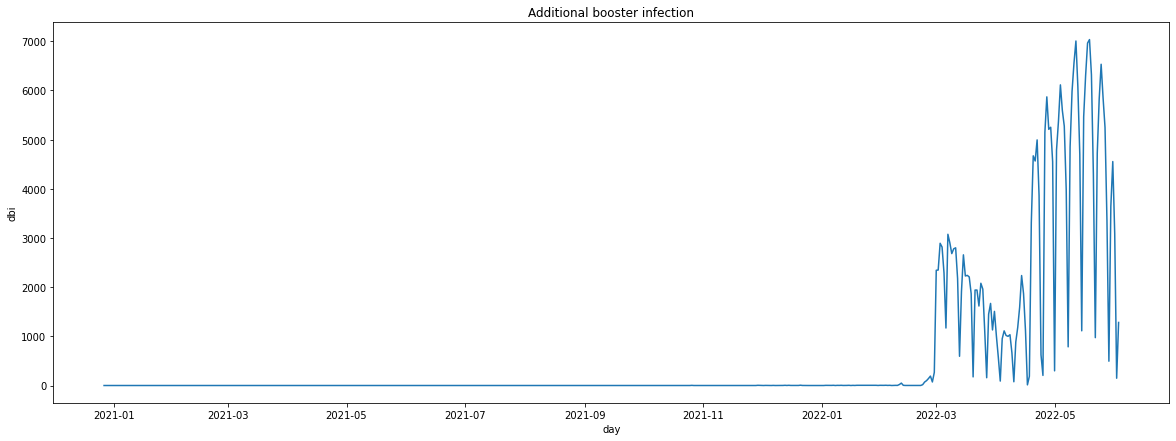

In [448]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="dbi",data=daily)
plt.title("Additional booster infection")
plt.show()

In [449]:
pfizer=data[data["supplier"]=="Pfizer/BioNTech"]
pfizer=pd.DataFrame(pfizer.groupby("date")["dailytotal"].sum())
pfizer["day"]=df.date.unique()
pfizer

,dailytotal,day
date,,
2020-12-27,7348,2020-12-27
2020-12-28,1501,2020-12-28
2020-12-29,1094,2020-12-29
2020-12-30,4876,2020-12-30
2020-12-31,25949,2020-12-31
...,...,...
2022-05-30,18207,2022-05-30
2022-05-31,21633,2022-05-31
2022-06-01,16710,2022-06-01


Text(0.5, 1.0, 'Pfizer vaccinations')

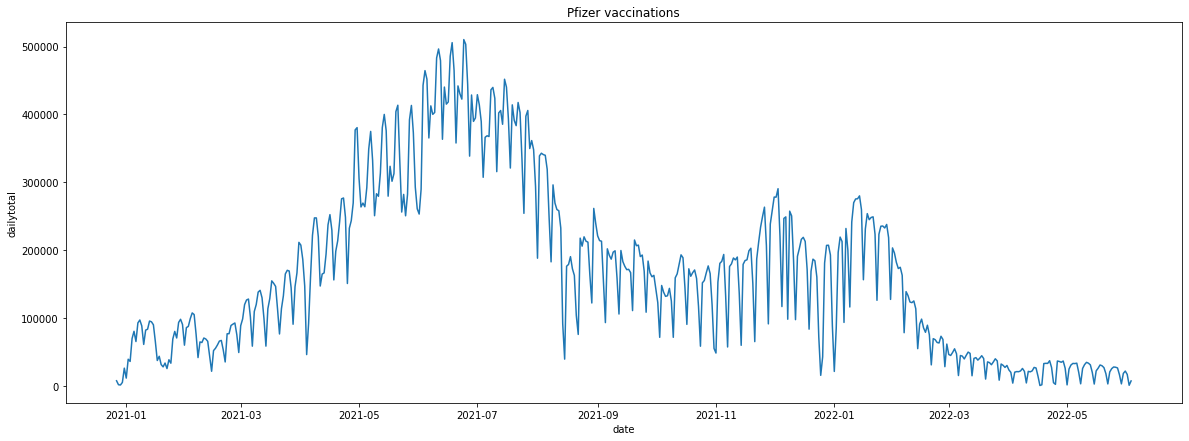

In [450]:
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=pfizer)
plt.title ("Pfizer vaccinations")

Text(0.5, 1.0, 'Moderna vaccinations')

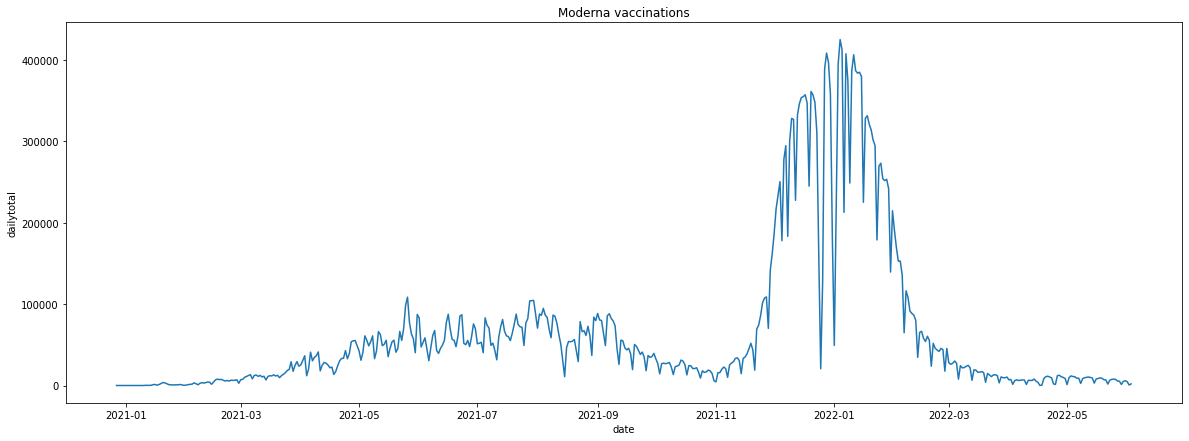

In [451]:
moderna=data[data["supplier"]=="Moderna"]
moderna=pd.DataFrame(moderna.groupby("date")["dailytotal"].sum())
#moderna["day"]=df.date.unique()

plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=moderna)
plt.title ("Moderna vaccinations")


in moderna devo inserire un valore mancante per il 31-12-2020 ossia indice di riga 4
https://stackoverflow.com/questions/15888648/is-it-possible-to-insert-a-row-at-an-arbitrary-position-in-a-dataframe-using-pan


Text(0.5, 1.0, 'Janssen vaccinations')

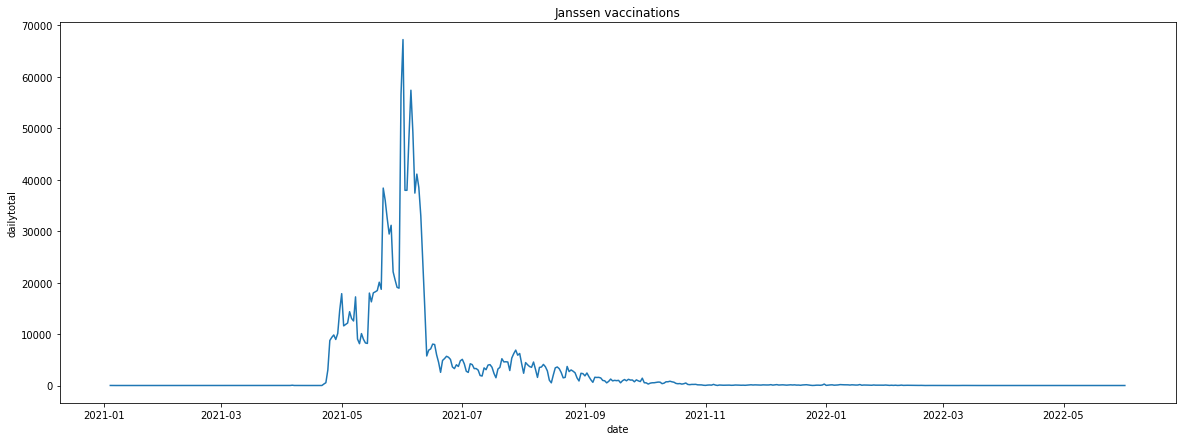

In [452]:
data.supplier.unique()
janssen=data[data["supplier"]=="Janssen"]
janssen=pd.DataFrame(janssen.groupby("date")["dailytotal"].sum())
janssen

plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=janssen)
plt.title ("Janssen vaccinations")

Text(0.5, 1.0, 'Astrazeneca vaccinations')

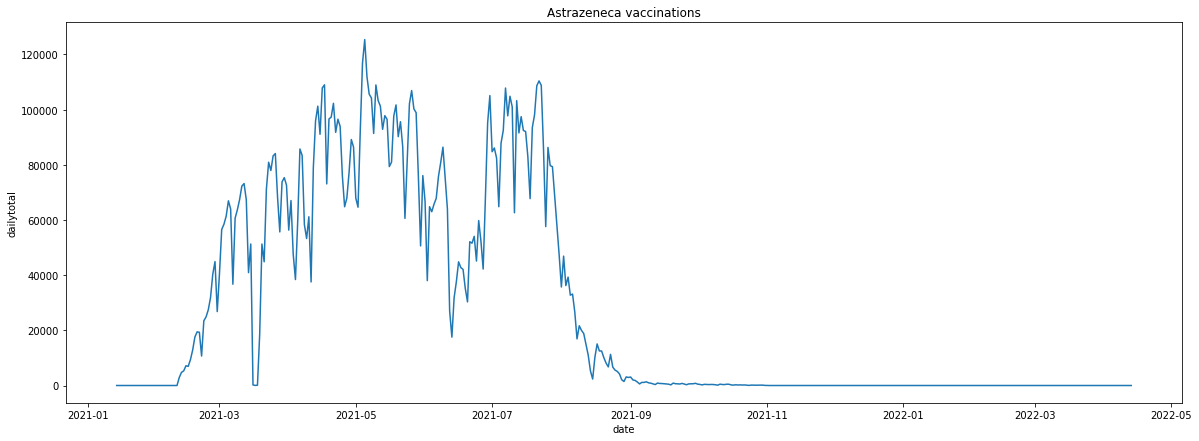

In [453]:
data.supplier.unique()
astra=data[data["supplier"]=="Vaxzevria (AstraZeneca)"]
astra=pd.DataFrame(astra.groupby("date")["dailytotal"].sum())
astra
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=astra)
plt.title ("Astrazeneca vaccinations")


Text(0.5, 1.0, "Pfizer for children's vaccinations")

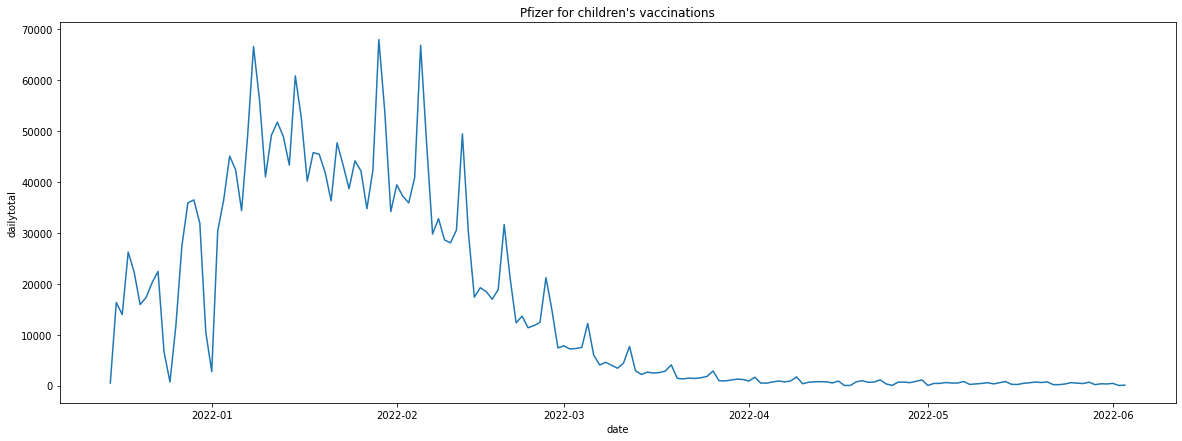

In [454]:
pfizch=data[data["supplier"]=="Pfizer for children"]
pfizch=pd.DataFrame(pfizch.groupby("date")["dailytotal"].sum())
pfizch
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=pfizch)
plt.title ("Pfizer for children's vaccinations")

Text(0.5, 1.0, 'Novavax vaccinations')

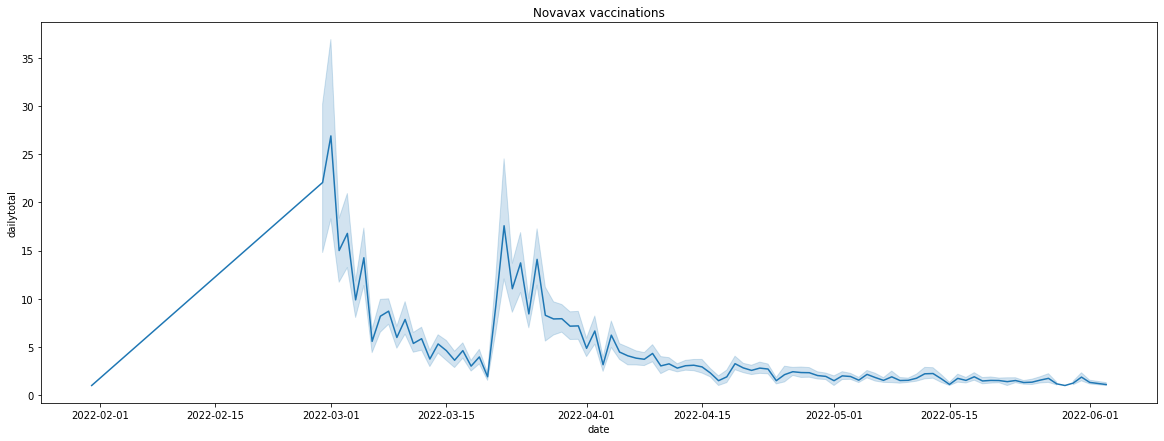

In [457]:
nova=data[data["supplier"]=="Novavax"]
pfizch=pd.DataFrame(pfizch.groupby("date")["dailytotal"].sum())
pfizch
plt.figure(figsize=(20,7))
sns.lineplot(x="date",y="dailytotal",data=nova)
plt.title ("Novavax vaccinations")

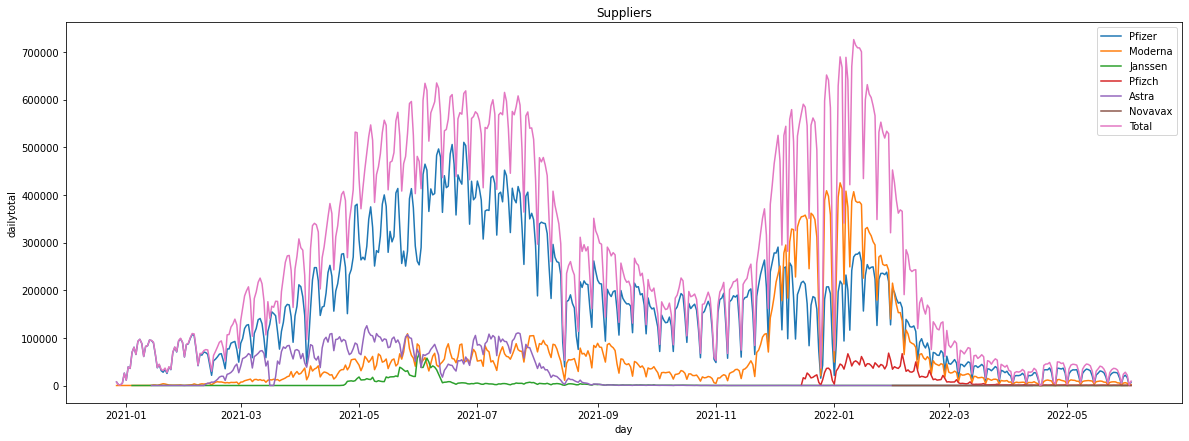

In [460]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="dailytotal",data=pfizer,label= "Pfizer").get_figure()
sns.lineplot(x="date",y="dailytotal",data=moderna,label="Moderna")
sns.lineplot(x="date",y="dailytotal",data=janssen,label = "Janssen")
sns.lineplot(x="date",y="dailytotal",data=pfizch,label ="Pfizch")
sns.lineplot(x="date",y="dailytotal",data=astra,label="Astra")
sns.lineplot(x="date",y="dailytotal",data=nova,label="Novavax")
sns.lineplot(x="date",y="TotVaccine",data=daily,label="Total")
plt.title("Suppliers")
plt.savefig('save_as_a_png.png')
plt.show()

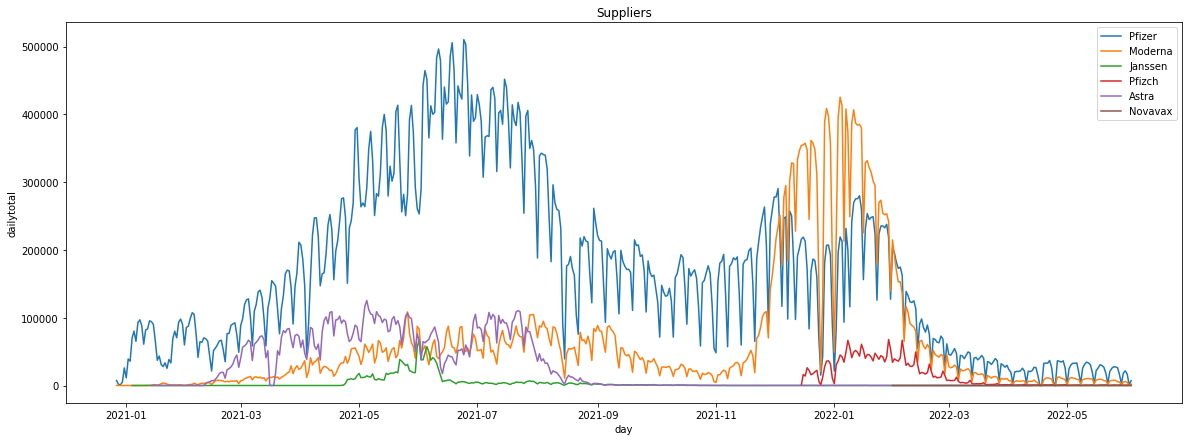

In [461]:
plt.figure(figsize=(20,7))
sns.lineplot(x="day",y="dailytotal",data=pfizer,label= "Pfizer").get_figure()
sns.lineplot(x="date",y="dailytotal",data=moderna,label="Moderna")
sns.lineplot(x="date",y="dailytotal",data=janssen,label = "Janssen")
sns.lineplot(x="date",y="dailytotal",data=pfizch,label ="Pfizch")
sns.lineplot(x="date",y="dailytotal",data=astra,label="Astra")
sns.lineplot(x="date",y="dailytotal",data=nova,label="Novavax")
plt.title("Suppliers")
plt.savefig('save_as_a_png.png')
plt.show()

In [462]:
Vaccination=pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
Vaccination

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


We found as well another Dataset who can be used for confirmation to extend our research 

In [463]:
Italy=Vaccination[Vaccination.country=="Italy"]
Italy.tail(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
38866,Italy,ITA,2022-03-27,135785891.0,50719613.0,47805978.0,12892.0,45611.0,224.93,84.02,79.19,756.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Extraordinary commissioner for the Covid-19 em...,https://raw.githubusercontent.com/italia/covid...
38867,Italy,ITA,2022-03-28,135830078.0,50721490.0,47811809.0,44187.0,44507.0,225.01,84.02,79.20,737.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Extraordinary commissioner for the Covid-19 em...,https://raw.githubusercontent.com/italia/covid...
38868,Italy,ITA,2022-03-29,135870869.0,50723408.0,47817555.0,40791.0,43160.0,225.07,84.02,79.21,715.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Extraordinary commissioner for the Covid-19 em...,https://raw.githubusercontent.com/italia/covid...


In [464]:
Vaccination.isnull().mean()

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.495943
people_vaccinated                      0.522679
people_fully_vaccinated                0.551484
daily_vaccinations_raw                 0.591247
daily_vaccinations                     0.003456
total_vaccinations_per_hundred         0.495943
people_vaccinated_per_hundred          0.522679
people_fully_vaccinated_per_hundred    0.551484
daily_vaccinations_per_million         0.003456
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [465]:
Vaccination.groupby("country")["people_vaccinated"].max()

country
Afghanistan           5082824.0
Albania               1278902.0
Algeria               7461932.0
Andorra                 57817.0
Angola               11235059.0
                        ...    
Wales                 2528664.0
Wallis and Futuna        6483.0
Yemen                  643501.0
Zambia                2829929.0
Zimbabwe              5053114.0
Name: people_vaccinated, Length: 223, dtype: float64

In [466]:
Vaccination.pivot_table(values="people_fully_vaccinated",index=["country"],aggfunc="max")

,people_fully_vaccinated
country,
Afghanistan,4420127.0
Albania,1215199.0
Algeria,6110712.0
Andorra,53367.0
Angola,5993792.0
...,...
Wales,2399341.0
Wallis and Futuna,6457.0
Yemen,404781.0


In [467]:
Vaccination[["country","people_vaccinated"]].groupby("country").max()

,people_vaccinated
country,
Afghanistan,5082824.0
Albania,1278902.0
Algeria,7461932.0
Andorra,57817.0
Angola,11235059.0
...,...
Wales,2528664.0
Wallis and Futuna,6483.0
Yemen,643501.0


In [468]:
Vaccination[["country","people_vaccinated_per_hundred"]].groupby("country").max()

,people_vaccinated_per_hundred
country,
Afghanistan,12.76
Albania,44.52
Algeria,16.72
Andorra,74.74
Angola,33.11
...,...
Wales,79.77
Wallis and Futuna,58.44
Yemen,2.11


In [469]:
Vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [470]:
Vaccination[["country","total_vaccinations"]].groupby("country").max()

,total_vaccinations
country,
Afghanistan,5751015.0
Albania,2754244.0
Algeria,13704895.0
Andorra,151997.0
Angola,17535411.0
...,...
Wales,6927437.0
Wallis and Futuna,13073.0
Yemen,807502.0
